###Trading Hypothesis:
If Interest Rates Rise, Technology Companies valuations will be impacted worse than the broader stock market.

###Based on research:
Technology companies are typically more sensitive to interest rate changes because their valuations heavily rely on discounted cash flow (DCF) models, which forecast future cash flows and discount them back to the present value using a rate that includes the cost of capital. As these companies often expect high future growth rates in revenue and cash flow, their present valuations are significantly influenced by changes in the discount rate, which rises with interest rates. Consequently, when interest rates increase, the present value of these projected future cash flows decreases, leading to lower valuations. Thus, technology stocks are generally more vulnerable to interest rate hikes compared to less growth-dependent sectors, due to their reliance on long-term, high-growth expectations.

In [2]:
!pip install --upgrade pandas_datareader

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [24]:
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    log_returns = np.log(stockData) - np.log(stockData.shift(1))
    covMatrix = log_returns.cov()
    corMatrix = log_returns.corr()
    annual_volatility = log_returns.std() * np.sqrt(252)  # Annualizing the volatility
    return stockData, log_returns, covMatrix, corMatrix, annual_volatility

indices = ['^GSPC', '^IXIC']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=1000)
prices, log_returns, covMatrix, corMatrix, annual_volatility = get_data(indices, startDate, endDate)

vol_SP500 = annual_volatility['^GSPC']
vol_NASD = annual_volatility['^IXIC']

print(f"Annualized Volatility for S&P 500: {vol_SP500}")
print(f"Annualized Volatility for NASDAQ: {vol_NASD}")


[*********************100%%**********************]  2 of 2 completed

Annualized Volatility for S&P 500: 0.17731638029370075
Annualized Volatility for NASDAQ: 0.2369492507198495


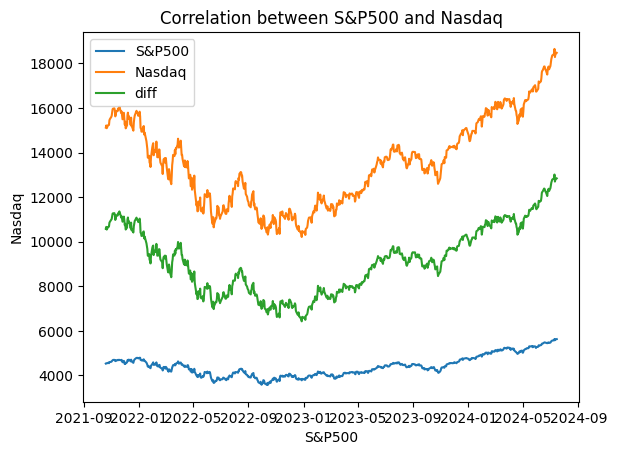

In [8]:
plt.plot(prices)
plt.title('Correlation between S&P500 and Nasdaq')
plt.xlabel('S&P500')
plt.ylabel('Nasdaq')
plt.legend(['S&P500', 'Nasdaq', 'diff'])
plt.show()

stats
 Ticker        ^GSPC         ^IXIC          diff
count    686.000000    686.000000    686.000000
mean    4413.747715  13549.247214   9135.499499
std      463.747331   1963.575639   1513.219807
min     3577.030029  10213.290039   6430.070068
25%     4052.120056  11816.230225   7794.084656
50%     4373.415039  13520.115234   9159.000000
75%     4684.672485  15161.369873  10451.764648
max     5633.910156  18647.449219  13013.539062 

last price diff 12841.34619140625


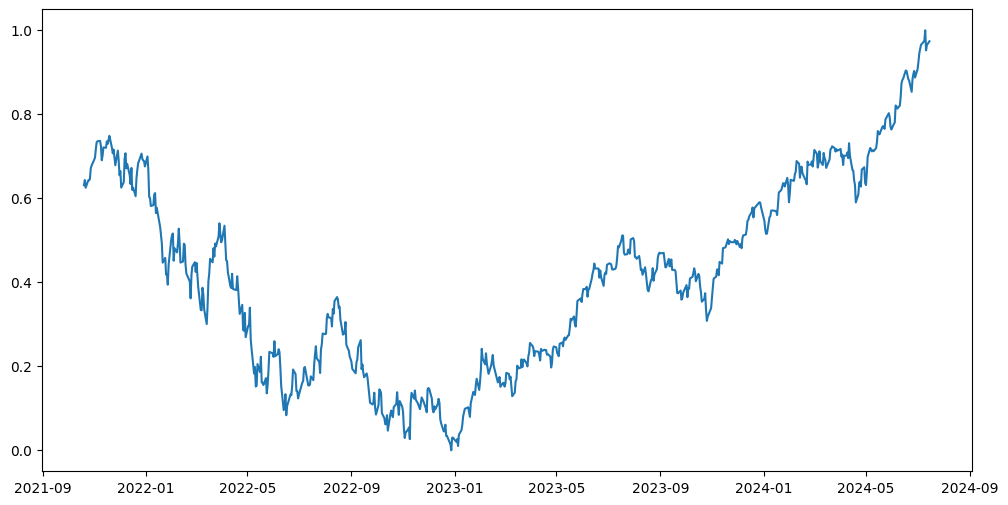

In [14]:
print('stats\n',prices.describe(), '\n\nlast price diff',prices['diff'][-1])

df = prices['diff']
normalised_df =(df-df.mean())/df.std()
#to use min-max normalisation:
mm_normalised_df =(df-df.min())/(df.max()-df.min())

#plt.plot(normalised_df)
plt.figure(figsize=(12,6))
plt.plot(mm_normalised_df)

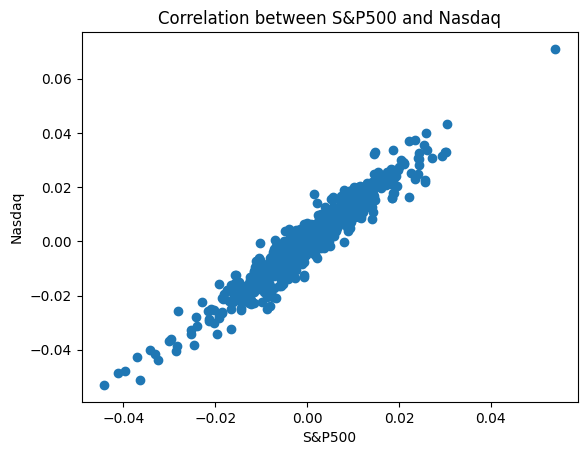

Index Correlation:  Ticker     ^GSPC     ^IXIC
Ticker                    
^GSPC   1.000000  0.958642
^IXIC   0.958642  1.000000
Index Covariance to Volatility:  Ticker     ^GSPC     ^IXIC
Ticker                    
^GSPC   0.177316  0.200692
^IXIC   0.200692  0.236949
Index Volatility:  Ticker
^GSPC    0.177187
^IXIC    0.236776
dtype: float64


In [15]:
plt.scatter(log_returns['^GSPC'], log_returns['^IXIC'])
plt.title('Correlation between S&P500 and Nasdaq')
plt.xlabel('S&P500')
plt.ylabel('Nasdaq')
plt.show()
print('Index Correlation: ', corMatrix)
print('Index Covariance to Volatility: ', np.sqrt(covMatrix)*np.sqrt(252))
print('Index Volatility: ', np.std(log_returns)*np.sqrt(252))

##Trading Opportunities in Equity Index Futures

In order to construct this spread between Index Futures, we must first calculate a Spread Ratio. The spread ratio is defined as the notional value of one index future divided by the notional value of another.

In this case, we will divide the notional value of the NASDAQ-100 futures by the notional value of the S&P 500 futures.

###Executing the Trade
Example: A portfolio manager (PM) believes the tech sector is at risk versus the broad market. He is willing to express this opinion with a $10 million equivalent risk position, leading the PM to take the following actions:

* The PM sells the E-mini NASDAQ-100/E- mini S&P 500 spread

In [20]:
#Parameters
SP500 = 5631.22
NASD = 18472.57

emini_SP500_x = 50 #$50 per point
emini_NASD_x = 20 #$20 per point

emini_SP500 = SP500*emini_SP500_x
emini_NASD = NASD*emini_NASD_x

spread_ratio = emini_NASD/emini_SP500

print("Notional Value of E-mini S&P500: ", round(emini_SP500,0))
print("Notional Value of E-mini Nasdaq: ", round(emini_NASD,0))
print("Spread Ratio: ", round(spread_ratio,2))

Notional Value of E-mini S&P500:  281561.0
Notional Value of E-mini Nasdaq:  369451.0
Spread Ratio:  1.31


In [21]:
print('Portfolio Position: $', 10000000, '\n')

print('Short Position in E-mini NASDAQ: ', int(10000000/emini_NASD))
print('Short Position in E-mini S&P500: ', int(10000000/emini_SP500))


Portfolio Position: $ 10000000 

Short Position in E-mini NASDAQ:  27
Short Position in E-mini S&P500:  35


##OTHER OPTION: OTC Spread Options on Indices
One of the main uses of Monte Carlo simulation is for pricing options under multiple stochastic factors.

Pricing options whose pay-off depends on multiple asset prices, or with stochastic volatility. Let's consider a European spread option on the difference between two assets (stock indices) and which follow a GBM process.



In [25]:
# Parameters
SP500 = 5631.22
NASD = 18472.57
div_SP500 = 0.0127
div_NASD = 0.0126
vol_SP500 = 0.177316
vol_NASD = 0.236949
K = 12840.78 # current difference between index points
T = 1
r = 0.0423 # 10yr US Treasury Bond
rho = 0.958642 # correlation
N = 1 # discrete time steps
M = 1000 # number of simulations

#Slow Steps

In [27]:
#Precompute constants
dt = T/N
S1 = NASD
S2 = SP500
nudt1 = (r- div_NASD - 0.5*vol_NASD**2)*dt
nudt2 = (r- div_SP500 - 0.5*vol_SP500**2)*dt
vol1sdt = vol_NASD*np.sqrt(dt)
vol2sdt = vol_SP500*np.sqrt(dt)
srho = np.sqrt(1-rho**2)

# Standard Error Placeholders
sum_CT = 0
sum_CT2 = 0

# Monte Carlo Method
for i in range(M):
  St1 = NASD
  St2 = SP500
  for j in range(N):
    dz1 = np.random.normal()
    dz2 = np.random.normal()
    z1 = dz1
    z2 = rho*dz1 + srho*dz2
    St1 = St1*np.exp(nudt1 + vol1sdt*z1)
    St2 = St2*np.exp(nudt2 + vol2sdt*z2)

  CT = max(0, K - (St1 - St2))

  sum_CT = sum_CT + CT
  sum_CT2 = sum_CT2 + CT*CT

#Compute Expectation and SE
C0 = np.exp(-r*T)*sum_CT/M
sigma = np.sqrt( (sum_CT2 - sum_CT*sum_CT/M)*np.exp(-2*r*T)/ (M/1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

Call value is $1278.55 with SE +/- 53.84


In [28]:
# Precompute constants
N=100
dt = T/N
S1 = NASD
S2 = SP500
nu1dt = (r - div_NASD - 0.5*vol_NASD**2)*dt
nu2dt = (r - div_SP500 - 0.5*vol_SP500**2)*dt
vol1sdt = vol_NASD*np.sqrt(dt)
vol2sdt = vol_SP500*np.sqrt(dt)
srho = np.sqrt(1-rho**2)

# Monte Carlo Method
dz1 = np.random.normal(size=(N, M))
dz2 = np.random.normal(size=(N, M))
Z1 = dz1
Z2 = rho*dz1 + srho*dz2
delta_St1 = nu1dt + vol1sdt*Z1
delta_St2 = nu2dt + vol2sdt*Z2
ST1 = S1*np.cumprod( np.exp(delta_St1), axis=0)
ST2 = S2*np.cumprod( np.exp(delta_St2), axis=0)
ST1 = np.concatenate( (np.full(shape=(1, M), fill_value=S1), ST1 ) )
ST2 = np.concatenate( (np.full(shape=(1, M), fill_value=S2), ST2 ) )

CT = np.maximum(0, K - (ST1[-1] - ST2[-1]))
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
SE= sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))

Call value is $1325.92 with SE +/- 53.635
